## Compute your own Word Embeddings - Dracula

In this notebook, we will compute the word embeddings using the fasttext library based on the book "Dracula" by Bram Stoker, published in 1897. The book is freely available as a txt file from project Guthenberg under this url: https://www.gutenberg.org/ebooks/345 

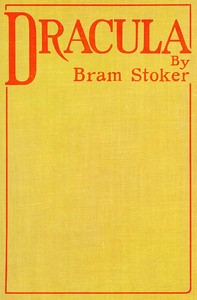

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

### Reading the raw data

We start by reading the content of the book.

In [2]:
book_file = open("./dracula.txt", "r", encoding="utf-8")
book = book_file.read()
book_file.close()

Let's look at the first few characters of the book.

In [3]:
print(book[0:1500])

﻿The Project Gutenberg eBook of Dracula
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Dracula

Author: Bram Stoker

Release date: October 1, 1995 [eBook #345]
                Most recently updated: November 12, 2023

Language: English

Credits: Chuck Greif and the Online Distributed Proofreading Team


*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***




                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

             

We see that the beginning of the book is a preamble followed by a table of contents. The actual content of the book start with Chapter 1. We also find that the patter `***` is used to separate project info from the actual content of the text. 

### Basic data cleaning

We can use the pattern to split the text into chapters. 

In [4]:
chapters_ = re.split("CHAPTER ", book)

In [5]:
[ chap[:200] for chap in chapters_ ]

['\ufeffThe Project Gutenberg eBook of Dracula\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. ',
 'I. Jonathan Harker’s Journal\n',
 'II. Jonathan Harker’s Journal\n',
 'III. Jonathan Harker’s Journal\n',
 'IV. Jonathan Harker’s Journal\n',
 'V. Letters—Lucy and Mina\n',
 'VI. Mina Murray’s Journal\n',
 'VII. Cutting from “The Dailygraph,” 8 August\n',
 'VIII. Mina Murray’s Journal\n',
 'IX. Mina Murray’s Journal\n',
 'X. Mina Murray’s Journal\n',
 'XI. Lucy Westenra’s Diary\n',
 'XII. Dr. Seward’s Diary\n',
 'XIII. Dr. Seward’s Diary\n',
 'XIV. Mina Harker’s Journal\n',
 'XV. Dr. Seward’s Diary\n',
 'XVI. Dr. Seward’s Diary\n',
 'XVII. Dr. Seward’s Diary\n',
 'XVIII. Dr. Seward’s Diary\n',
 'XIX. Jonathan Harker’s Journal\n',
 'XX. Jonathan Harker’s Journal\n',
 'XXI. Dr. Seward’s Diary\n',
 'XXII. Jonathan Harker’s Journal\n',
 'XXIII. Dr. Seward’s Diary\n',
 'XXIV. Dr

Again, to get an overview of the book, we print the first 200 characters of each chapter:

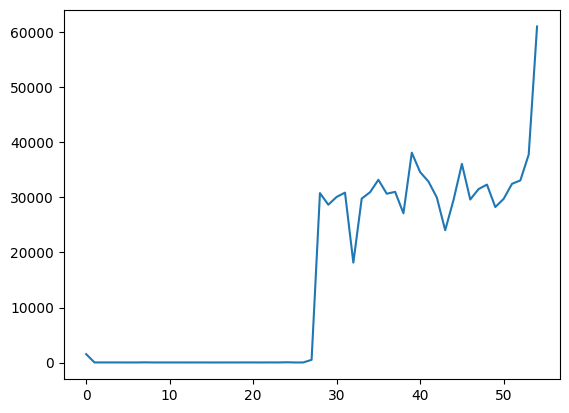

In [6]:
plt.plot([len(chapter) for chapter in chapters_])

In [7]:
good_chapters = [chapter.replace('\n',' ') for chapter in chapters_ if len(chapter)>2000]

In [8]:
[ chap[:200] for chap in good_chapters ]

['I  JONATHAN HARKER’S JOURNAL  (_Kept in shorthand._)   _3 May. Bistritz._--Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an h',
 'II  JONATHAN HARKER’S JOURNAL--_continued_   _5 May._--I must have been asleep, for certainly if I had been fully awake I must have noticed the approach of such a remarkable place. In the gloom the co',
 'III  JONATHAN HARKER’S JOURNAL--_continued_   When I found that I was a prisoner a sort of wild feeling came over me. I rushed up and down the stairs, trying every door and peering out of every window',
 'IV  JONATHAN HARKER’S JOURNAL--_continued_   I awoke in my own bed. If it be that I had not dreamt, the Count must have carried me here. I tried to satisfy myself on the subject, but could not arrive ',
 'V  _Letter from Miss Mina Murray to Miss Lucy Westenra._   “_9 May._  “My dearest Lucy,--  “Forgive my long delay in writing, but I have been simply overwhelmed with work. The li

In [9]:
# !pip install gensim nltk

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

# Tokenize sentences
tokenized_sentences = [word_tokenize(chapter.lower()) for chapter in good_chapters]

Let's again look at the first 20 tokens of the first 2 sentences:

In [12]:
[ sent[:20] for sent in tokenized_sentences[:2] ]

[['i',
  'jonathan',
  'harker',
  '’',
  's',
  'journal',
  '(',
  '_kept',
  'in',
  'shorthand._',
  ')',
  '_3',
  'may',
  '.',
  'bistritz._',
  '--',
  'left',
  'munich',
  'at',
  '8:35'],
 ['ii',
  'jonathan',
  'harker',
  '’',
  's',
  'journal',
  '--',
  '_continued_',
  '_5',
  'may._',
  '--',
  'i',
  'must',
  'have',
  'been',
  'asleep',
  ',',
  'for',
  'certainly',
  'if']]

In [13]:
# Train FastText model
model = FastText(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1,
                 workers=1, sg=1, seed=42)


In [14]:
# Access embeddings
word_embeddings = model.wv
print(word_embeddings['blood'])

[-0.17170827  0.01594794  0.31046194  0.15127857 -0.47916162  0.42798564
 -0.55744517  0.03303687  0.06482461  0.19093353  0.12002496 -0.3148609
  0.6480318   0.26364902  0.06320828  0.34435645  0.39564136 -0.32918632
 -0.8669687  -0.35198662 -0.01916987  0.10016022  0.5588777   0.31112555
  0.19301683 -0.14353104 -0.03135667  0.7075974  -0.71999747  0.6916624
  0.01510853 -0.03059572 -0.26042077  0.37933034 -0.8448704   0.15861793
  0.31985903  0.07470595 -0.24404284 -0.31705478 -0.3461812   0.57735944
 -0.29605943  0.19567086  0.7980123  -0.91895014 -0.01861222  0.00604821
 -0.04803235  0.05641289]


In [15]:
model.wv.most_similar('blood')

[('life-blood', 0.991051197052002),
 ('bloody', 0.98297119140625),
 ('bloodless', 0.981428325176239),
 ('death-beauty', 0.9808684587478638),
 ('blood.', 0.978346586227417),
 ('pole', 0.9751719236373901),
 ('features', 0.9749549031257629),
 ('blot', 0.974745512008667),
 ('errors', 0.9742821455001831),
 ('creatures', 0.9738898277282715)]

In [16]:
model.wv.most_similar('food')

[('hood', 0.9941005110740662),
 ('landlady', 0.992630124092102),
 ('derogatory', 0.992297351360321),
 ('purity', 0.9921227693557739),
 ('tenth', 0.9914929866790771),
 ('victory', 0.9912064075469971),
 ('land_', 0.9909618496894836),
 ('bradshaw', 0.9909471869468689),
 ('repulsion', 0.9908758401870728),
 ('views', 0.9908447861671448)]

In [17]:
model.wv.most_similar('body')

[('body.', 0.9856458306312561),
 ('scart', 0.9830433130264282),
 ('housebreaker', 0.9830130934715271),
 ('tea', 0.9829016327857971),
 ('court', 0.9828699231147766),
 ('courtliness', 0.981835663318634),
 ('body-snatcher', 0.9817771315574646),
 ('coin', 0.9813472628593445),
 ('cart', 0.9813452959060669),
 ('clearin', 0.9812021255493164)]